In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd
pd.options.display.max_columns = None
url = "https://drive.google.com/file/d/1-uCH-bTSSOaBkpk3pRYXfHWFzd7r6PG6/view?usp=sharing"
file_id = url.split('/')[-2]
dwn_url = "https://drive.google.com/uc?id=" + file_id
df = pd.read_csv(dwn_url)

In [ ]:
df.head(10)

,ubigeo,renipress,diagnostic,ano,semana,tipo_dx,edad,tipo_edad,sexo,fecha_ini
0,21803,00001675,A97.0,2013,1,C,42,A,F,2013-01-02
1,21803,00001675,A97.0,2013,1,C,66,A,F,2013-01-01
2,21803,00001675,A97.0,2013,1,C,13,A,M,2013-01-02
3,21803,00001675,A97.0,2013,1,C,54,A,F,2013-01-03
4,21803,00009047,A97.0,2013,1,C,28,A,F,2013-01-05
5,21803,00001675,A97.0,2013,1,C,33,A,F,2013-01-01
6,21803,00001675,A97.0,2013,1,C,31,A,F,2013-01-01
7,21801,00001703,A97.1,2013,1,C,20,A,F,2013-01-05
8,21803,00001675,A97.0,2013,1,C,14,A,F,2012-12-31
9,21803,00001675,A97.0,2013,1,C,7,A,M,2012-12-31


In [ ]:
df['diagnostic'].value_counts()

A97.0    524051
A97.1     76635
A97.2      2501
Name: diagnostic, dtype: int64

In [ ]:
df_agrupado = df.groupby('fecha_ini', as_index=False).size()
df_agrupado

,fecha_ini,size
0,0000-00-00,9
1,2012-12-30,23
2,2012-12-31,31
3,2013-01-01,67
4,2013-01-02,55
...,...,...
3944,2023-10-17,349
3945,2023-10-18,313
3946,2023-10-19,248
3947,2023-10-20,241


In [ ]:
df['tipo_dx'].value_counts()

C    489978
P    113209
Name: tipo_dx, dtype: int64

In [ ]:
df = df[df['fecha_ini'] != '0000-00-00']

In [ ]:
df['fecha_ini'] = pd.to_datetime(df['fecha_ini'])

In [ ]:
df_agrupado = df.groupby('fecha_ini', as_index=False).size()
df_agrupado

,fecha_ini,size
0,2012-12-30,23
1,2012-12-31,31
2,2013-01-01,67
3,2013-01-02,55
4,2013-01-03,40
...,...,...
3943,2023-10-17,349
3944,2023-10-18,313
3945,2023-10-19,248
3946,2023-10-20,241


In [ ]:
df_conf = df[df['tipo_dx'] == 'C']

In [ ]:
df_agrupado = df_conf.groupby('fecha_ini', as_index=False).size()
df_agrupado



,fecha_ini,size
0,2012-12-30,23
1,2012-12-31,31
2,2013-01-01,67
3,2013-01-02,55
4,2013-01-03,40
...,...,...
3941,2023-10-17,102
3942,2023-10-18,73
3943,2023-10-19,57
3944,2023-10-20,70


<Axes: xlabel='fecha_ini', ylabel='size'>

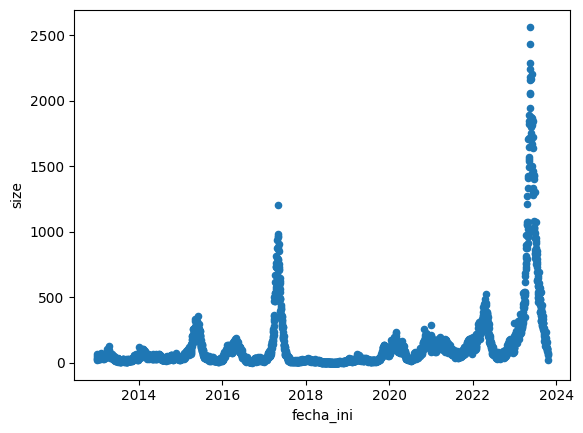

In [ ]:
df_agrupado.plot.scatter(x='fecha_ini', y = 'size')

In [ ]:
from prophet import Prophet
df_pred = df_agrupado.head(3916)
df_test = df_agrupado.tail(30)

df_pred = df_pred.rename(columns={"fecha_ini": "ds", "size": "y"})

In [ ]:
m = Prophet()
m.fit(df_pred)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5m3ik_nn/jlhp9l7b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5m3ik_nn/a7171vme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91420', 'data', 'file=/tmp/tmp5m3ik_nn/jlhp9l7b.json', 'init=/tmp/tmp5m3ik_nn/a7171vme.json', 'output', 'file=/tmp/tmp5m3ik_nn/prophet_model3fmugtbg/prophet_model-20231031164222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:42:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:42:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4251,2024-08-22,994.966893,681.972828,1107.778231,943.325130,1052.137332,-90.810531,-90.810531,-90.810531,-8.450923,-8.450923,-8.450923,-82.359607,-82.359607,-82.359607,0.0,0.0,0.0,904.156362
4252,2024-08-23,995.849402,692.406541,1133.794107,943.977403,1053.235140,-89.305544,-89.305544,-89.305544,-5.541346,-5.541346,-5.541346,-83.764198,-83.764198,-83.764198,0.0,0.0,0.0,906.543858
4253,2024-08-24,996.731911,711.564871,1134.683462,944.420876,1054.332948,-84.439351,-84.439351,-84.439351,0.747130,0.747130,0.747130,-85.186481,-85.186481,-85.186481,0.0,0.0,0.0,912.292560
4254,2024-08-25,997.614420,694.612348,1149.719576,945.161358,1055.461301,-78.860608,-78.860608,-78.860608,7.755158,7.755158,7.755158,-86.615766,-86.615766,-86.615766,0.0,0.0,0.0,918.753812
4255,2024-08-26,998.496929,703.796959,1151.501551,945.753335,1056.545360,-72.518619,-72.518619,-72.518619,15.521352,15.521352,15.521352,-88.039971,-88.039971,-88.039971,0.0,0.0,0.0,925.978310
4256,2024-08-27,999.379438,699.088665,1123.445104,946.345312,1057.644055,-91.659203,-91.659203,-91.659203,-2.213420,-2.213420,-2.213420,-89.445784,-89.445784,-89.445784,0.0,0.0,0.0,907.720235
4257,2024-08-28,1000.261947,680.740400,1106.740592,946.996129,1058.753392,-98.636796,-98.636796,-98.636796,-7.817950,-7.817950,-7.817950,-90.818846,-90.818846,-90.818846,0.0,0.0,0.0,901.625152
4258,2024-08-29,1001.144456,683.506889,1128.695303,947.696360,1059.869351,-100.594900,-100.594900,-100.594900,-8.450923,-8.450923,-8.450923,-92.143976,-92.143976,-92.143976,0.0,0.0,0.0,900.549556
4259,2024-08-30,1002.026965,680.747767,1129.207093,948.396592,1060.985309,-98.946766,-98.946766,-98.946766,-5.541346,-5.541346,-5.541346,-93.405420,-93.405420,-93.405420,0.0,0.0,0.0,903.080199
4260,2024-08-31,1002.909474,697.074801,1135.725654,949.096824,1062.101268,-93.839989,-93.839989,-93.839989,0.747130,0.747130,0.747130,-94.587119,-94.587119,-94.587119,0.0,0.0,0.0,909.069485


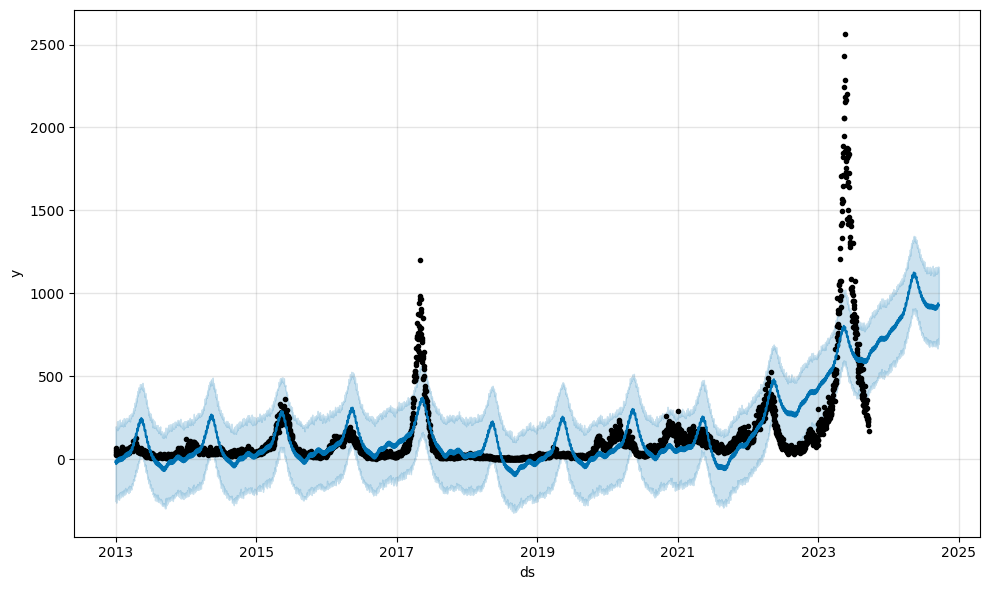

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
df_test

,fecha_ini,size
3916,2023-09-22,209
3917,2023-09-23,164
3918,2023-09-24,188
3919,2023-09-25,237
3920,2023-09-26,155
3921,2023-09-27,131
3922,2023-09-28,187
3923,2023-09-29,168
3924,2023-09-30,180
3925,2023-10-01,233


Agrupamiento por lugar de establecimiento de salud

In [ ]:
pd.options.display.max_columns = None
url = "https://drive.google.com/file/d/1UDdVebcfZdIlq8-b_WVPs9Jp09VyrmRw/view?usp=sharing"
file_id = url.split('/')[-2]
dwn_url = "https://drive.google.com/uc?id=" + file_id
df_tabla = pd.read_csv(dwn_url)
df_tabla


,id_eess,codigo_renaes,categoria,nombre,diresa,red,direccion,longitud,latitud,id_ubigeo
0,1,1,II-2,"HOSPITAL IQUITOS ""CESAR GARAYAR GARCIA""",LORETO,NO PERTENECE A NINGUNA RED,CALLE CORNEJO PORTUGAL 1710 IQUITOS MAYNAS LORETO,-73.253653,-3.762818,1453
1,2,2,SD,CENTRO REHABILITACION ENFERMO MENTAL,LORETO,NO PERTENECE A NINGUNA RED,CALLE 3 DE MAYO S/N CPM QUILCATACTA,NaN,NaN,1463
2,3,3,III-1,"HOSPITAL REGIONAL DE LORETO ""FELIPE SANTIAGO A...",LORETO,NO PERTENECE A NINGUNA RED,AVENIDA AVENIDA 28 DE JULIO S/N S/N AVENIDA 28...,-73.253417,-3.726960,1460
3,4,4,I-3,C.S. I-3 SANTA MARIA DE NANAY,LORETO,MAYNAS CIUDAD,OTROS CASERIO DE SANTA MARIA DE NANAY DISTRITO...,-73.696785,-3.888998,1454
4,5,5,I-1,SAMITO,LORETO,MAYNAS CIUDAD,OTROS CASERIO DE SAMITO SIN NUMERO DISTRITO AL...,-73.610928,-3.865167,1454
...,...,...,...,...,...,...,...,...,...,...
31482,31483,9999164,I-3,CENTRO DE SALUD MENTAL COMUNITARIO SAN ISIDRO ...,PUNO,NO PERTENECE A NINGUNA RED,NaN,NaN,NaN,1719
31483,31484,9999165,I-3,CENTRO DE SALUD MENTAL COMUNITARIO LA CAPILLA...,PUNO,NO PERTENECE A NINGUNA RED,NaN,NaN,NaN,1719
31484,31485,9999166,I-3,CENTRO DE SALUD MENTAL COMUNITARIO SAN MIGUEL ...,PUNO,NO PERTENECE A NINGUNA RED,NaN,NaN,NaN,1719
31485,31486,9999167,I-3,CENTRO DE SALUD MENTAL COMUNITARIO CALLAO,CALLAO,NO PERTENECE A NINGUNA RED,NaN,NaN,NaN,690


In [ ]:
df_tabla.isnull().sum()

id_eess              0
codigo_renaes        0
categoria            0
nombre               0
diresa               0
red                  0
direccion          167
longitud         13597
latitud          13597
id_ubigeo            0
dtype: int64

In [ ]:
provincia = df_tabla['diresa'].value_counts().index.to_list()
provincia

['LIMA DIRIS CENTRO',
 'LIMA DIRIS NORTE',
 'LIMA DIRIS SUR',
 'LIMA DIRIS ESTE',
 'PIURA',
 'CAJAMARCA',
 'AREQUIPA',
 'CUSCO',
 'CALLAO',
 'JUNIN',
 'LIMA PROVINCIAS',
 'LORETO',
 'LA LIBERTAD',
 'LAMBAYEQUE',
 'PUNO',
 'SAN MARTIN',
 'AMAZONAS',
 'ANCASH',
 'AYACUCHO',
 'TACNA',
 'APURIMAC',
 'ICA',
 'HUANUCO',
 'HUANCAVELICA',
 'PASCO',
 'UCAYALI',
 'MADRE DE DIOS',
 'MOQUEGUA',
 'TUMBES']

In [ ]:
d = {name: pd.DataFrame() for name in provincia}
for name, df_2 in d.items(): d[name] = df_tabla[df_tabla['diresa'] == name]

In [ ]:
id = d['LIMA DIRIS ESTE']['id_eess'].value_counts().index.to_list()


In [ ]:
df['renipress'] = df['renipress'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
#df['renipress'] = df['renipress'].str.lstrip('0').replace('.', '')
df

,ubigeo,renipress,diagnostic,ano,semana,tipo_dx,edad,tipo_edad,sexo,fecha_ini
0,21803,1675.0,A97.0,2013,1,C,42,A,F,2013-01-02
1,21803,1675.0,A97.0,2013,1,C,66,A,F,2013-01-01
2,21803,1675.0,A97.0,2013,1,C,13,A,M,2013-01-02
3,21803,1675.0,A97.0,2013,1,C,54,A,F,2013-01-03
4,21803,9047.0,A97.0,2013,1,C,28,A,F,2013-01-05
...,...,...,...,...,...,...,...,...,...,...
603182,110303,3443.0,A97.0,2023,42,P,21,A,M,2023-10-21
603183,60811,4256.0,A97.0,2023,42,P,12,A,F,2023-10-20
603184,240101,1882.0,A97.0,2023,42,C,15,A,F,2023-10-16
603185,240102,1866.0,A97.0,2023,42,P,26,A,M,2023-10-18


In [ ]:
#df.dropna(subset=['renipress'], inplace=True)

In [ ]:
#df_obj = df.select_dtypes(['object'])
#df_obj

In [ ]:
df['renipress']
#df['renipress'] = df['renipress'].map(float)

0         1675.0
1         1675.0
2         1675.0
3         1675.0
4         9047.0
           ...  
603182    3443.0
603183    4256.0
603184    1882.0
603185    1866.0
603186    5299.0
Name: renipress, Length: 603178, dtype: float64

In [ ]:
df_3 = df.loc[df['renipress'].isin(id)]
df_3

,ubigeo,renipress,diagnostic,ano,semana,tipo_dx,edad,tipo_edad,sexo,fecha_ini
4,21803,9047.0,A97.0,2013,1,C,28,A,F,2013-01-05
10,21809,9047.0,A97.0,2013,1,C,77,A,M,2013-01-03
173,220101,6733.0,A97.0,2013,1,C,19,A,M,2013-01-05
192,220104,6733.0,A97.0,2013,1,C,45,A,F,2013-01-05
310,220101,6733.0,A97.0,2013,2,C,12,A,F,2013-01-10
...,...,...,...,...,...,...,...,...,...,...
603056,21809,9047.0,A97.1,2023,42,C,62,A,F,2023-10-16
603065,21801,9047.0,A97.1,2023,42,C,58,A,M,2023-10-16
603098,220101,6733.0,A97.1,2023,42,P,31,A,M,2023-10-20
603109,220101,6733.0,A97.0,2023,42,P,4,A,M,2023-10-20


In [ ]:
pd.options.display.max_columns = None
url = "https://drive.google.com/file/d/1cn3KgOgUxSd14Mo4q-d6uFGWeHYrWr2s/view?usp=sharing"
file_id = url.split('/')[-2]
dwn_url = "https://drive.google.com/uc?id=" + file_id
lima_este = pd.read_csv(dwn_url)
lima_este


,YEAR,DOY,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,FechaMeteor
0,2012,1,23.26,17.15,22.17,75.56,0.00,20120101
1,2012,2,24.35,16.88,22.96,73.50,0.00,20120102
2,2012,3,23.73,16.37,22.58,76.25,0.03,20120103
3,2012,4,24.05,16.23,22.44,74.94,0.02,20120104
4,2012,5,20.95,16.08,20.64,79.75,0.02,20120105
...,...,...,...,...,...,...,...,...
4313,2023,296,21.71,16.28,20.06,74.81,1.23,20231023
4314,2023,297,22.30,16.10,20.17,75.69,3.20,20231024
4315,2023,298,20.56,15.46,19.08,82.56,13.28,20231025
4316,2023,299,20.75,14.41,19.18,81.75,1.34,20231026


In [ ]:
lima_este['FechaMeteor'] = pd.to_datetime(lima_este['FechaMeteor'], format="%Y%m%d")
lima_este

,YEAR,DOY,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,FechaMeteor
0,2012,1,23.26,17.15,22.17,75.56,0.00,2012-01-01
1,2012,2,24.35,16.88,22.96,73.50,0.00,2012-01-02
2,2012,3,23.73,16.37,22.58,76.25,0.03,2012-01-03
3,2012,4,24.05,16.23,22.44,74.94,0.02,2012-01-04
4,2012,5,20.95,16.08,20.64,79.75,0.02,2012-01-05
...,...,...,...,...,...,...,...,...
4313,2023,296,21.71,16.28,20.06,74.81,1.23,2023-10-23
4314,2023,297,22.30,16.10,20.17,75.69,3.20,2023-10-24
4315,2023,298,20.56,15.46,19.08,82.56,13.28,2023-10-25
4316,2023,299,20.75,14.41,19.18,81.75,1.34,2023-10-26


In [ ]:
lima_este = lima_este.drop(labels=['YEAR', 'DOY'], axis=1)
lima_este

,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,FechaMeteor
0,23.26,17.15,22.17,75.56,0.00,2012-01-01
1,24.35,16.88,22.96,73.50,0.00,2012-01-02
2,23.73,16.37,22.58,76.25,0.03,2012-01-03
3,24.05,16.23,22.44,74.94,0.02,2012-01-04
4,20.95,16.08,20.64,79.75,0.02,2012-01-05
...,...,...,...,...,...,...
4313,21.71,16.28,20.06,74.81,1.23,2023-10-23
4314,22.30,16.10,20.17,75.69,3.20,2023-10-24
4315,20.56,15.46,19.08,82.56,13.28,2023-10-25
4316,20.75,14.41,19.18,81.75,1.34,2023-10-26


In [ ]:
lima_este = lima_este.rename(columns={"FechaMeteor": "fecha_ini"})


In [ ]:
df_conf = df_3[df_3['tipo_dx'] == 'C']

In [ ]:
df_agrupado = df_3.groupby('fecha_ini', as_index=False).size()
df_agrupado

,fecha_ini,size
0,2013-01-03,1
1,2013-01-05,3
2,2013-01-06,1
3,2013-01-07,3
4,2013-01-10,1
...,...,...
2377,2023-10-16,5
2378,2023-10-17,3
2379,2023-10-18,3
2380,2023-10-19,3


<Axes: xlabel='fecha_ini', ylabel='size'>

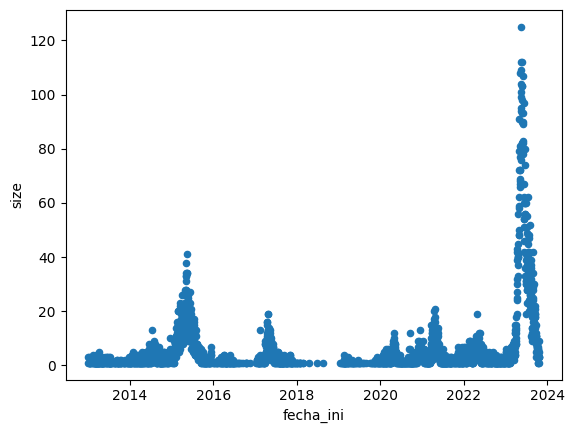

In [ ]:
df_agrupado.plot.scatter(x='fecha_ini', y = 'size')

In [ ]:
df_lima_este = df_agrupado.set_index('fecha_ini').join(lima_este.set_index('fecha_ini'))

In [ ]:
df_lima_este = df_lima_este.reset_index()
df_lima_este = df_lima_este.dropna()

<Axes: xlabel='fecha_ini', ylabel='size'>

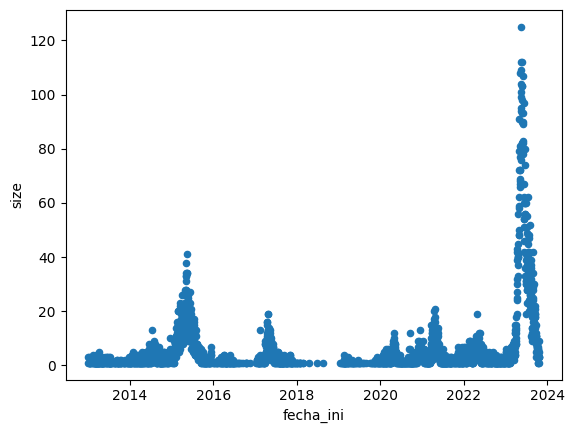

In [ ]:
df_lima_este.plot.scatter(x='fecha_ini', y = 'size')

In [ ]:
df_pred = df_lima_este


df_pred = df_pred.rename(columns={"fecha_ini": "ds", "size": "y"})
df_pred

,ds,y,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR
0,2013-01-03,1,23.54,15.94,22.33,71.69,0.00
1,2013-01-05,3,24.55,16.30,22.42,70.25,0.00
2,2013-01-06,1,23.01,16.31,22.13,70.44,0.03
3,2013-01-07,3,23.57,15.95,22.48,69.62,0.02
4,2013-01-10,1,24.17,16.85,23.37,68.56,0.01
...,...,...,...,...,...,...,...
2377,2023-10-16,5,23.81,15.32,21.07,70.69,1.03
2378,2023-10-17,3,22.28,15.84,20.30,77.69,4.60
2379,2023-10-18,3,22.62,16.04,20.19,77.38,6.34
2380,2023-10-19,3,23.33,16.48,20.89,73.50,1.54


In [ ]:
df_pred.corrwith(df_pred["y"])

<ipython-input-92-776c8a4a01bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pred.corrwith(df_pred["y"])


y              1.000000
T2M_MAX        0.248146
T2M_MIN        0.101274
TS             0.023776
RH2M           0.097446
PRECTOTCORR   -0.024248
dtype: float64

In [ ]:
train_end_date = '2023-09-20'

# Train test split
train = df_pred[df_pred['ds'] <= train_end_date]
test = df_pred[df_pred['ds'] > train_end_date]

print(train.shape)
print(test.shape)

(2352, 7)
(30, 7)


In [ ]:
model_baseline = Prophet(yearly_seasonality=True)

# Fit the model on the training dataset
model_baseline.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5m3ik_nn/9_asx45b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5m3ik_nn/dc4zn9dd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11075', 'data', 'file=/tmp/tmp5m3ik_nn/9_asx45b.json', 'init=/tmp/tmp5m3ik_nn/dc4zn9dd.json', 'output', 'file=/tmp/tmp5m3ik_nn/prophet_modelwx3o6hbp/prophet_model-20231031165136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:51:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:51:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


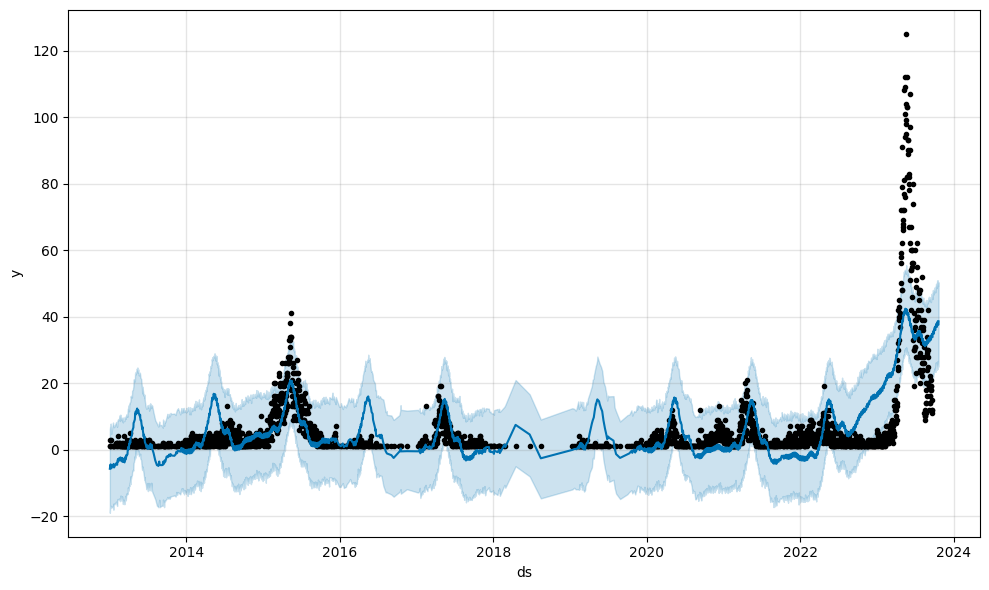

In [ ]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=30)

# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)

# Visualize the forecast
model_baseline.plot(forecast_baseline);

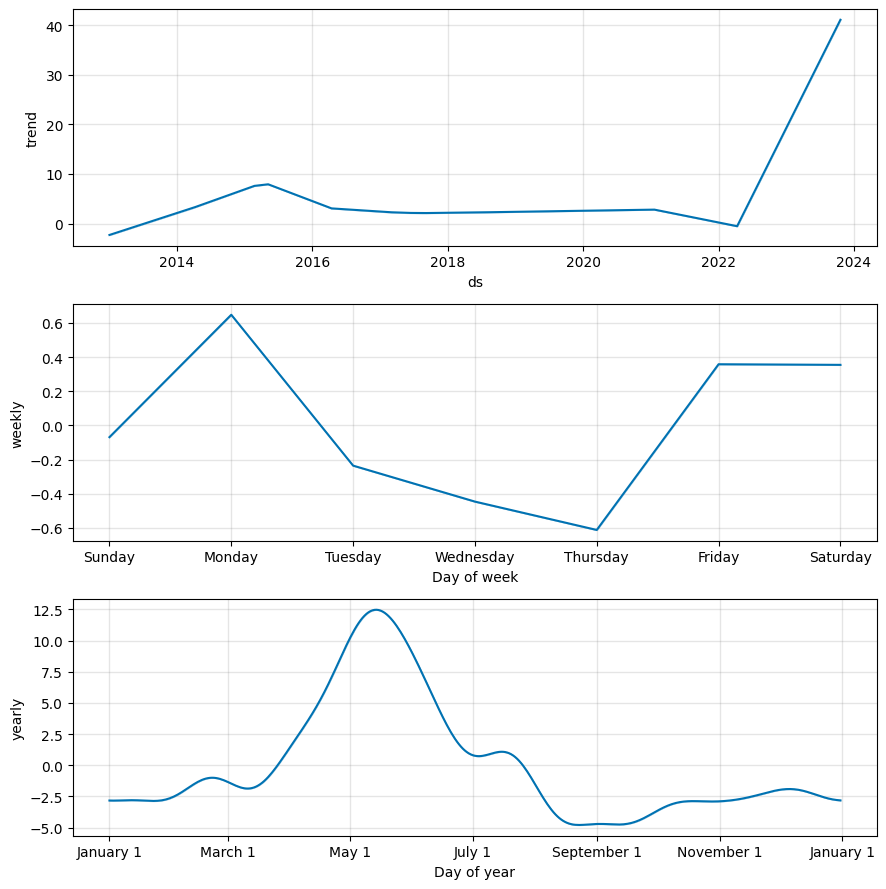

In [ ]:
model_baseline.plot_components(forecast_baseline);

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Merge actual and predicted values
performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-30:], on='ds')

# Check MAE value
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')

# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 30.626409928056123
The MAPE for the baseline model is 8.961592211598449


In [ ]:
# Add seasonality
model_multivariate = Prophet(yearly_seasonality=True)

# Add regressors
model_multivariate.add_regressor('T2M_MAX', standardize=False)
#model_multivariate.add_regressor('T2M_MIN', standardize=False)
model_multivariate.add_regressor('RH2M', standardize=False)

# Fit the model on the training dataset
model_multivariate.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5m3ik_nn/m16ih8y3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5m3ik_nn/j0i3jpxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14850', 'data', 'file=/tmp/tmp5m3ik_nn/m16ih8y3.json', 'init=/tmp/tmp5m3ik_nn/j0i3jpxy.json', 'output', 'file=/tmp/tmp5m3ik_nn/prophet_model7a1a7yah/prophet_model-20231031171919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:19:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:19:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create the time range for the forecast
future_multivariate = model_multivariate.make_future_dataframe(periods=30)

# Append the regressor values
future_multivariate = pd.merge(future_multivariate, df_pred[['ds', 'T2M_MAX', 'RH2M']], on='ds', how='inner')

# Fill the missing values with the previous value
future_multivariate = future_multivariate.fillna(method='ffill')

# Check the data
future_multivariate.tail(10)

,ds,T2M_MAX,RH2M
2372,2023-10-11,24.00,68.81
2373,2023-10-12,23.55,69.81
2374,2023-10-13,22.19,71.06
2375,2023-10-14,22.33,73.38
2376,2023-10-15,23.47,69.88
2377,2023-10-16,23.81,70.69
2378,2023-10-17,22.28,77.69
2379,2023-10-18,22.62,77.38
2380,2023-10-19,23.33,73.50
2381,2023-10-20,22.75,74.44


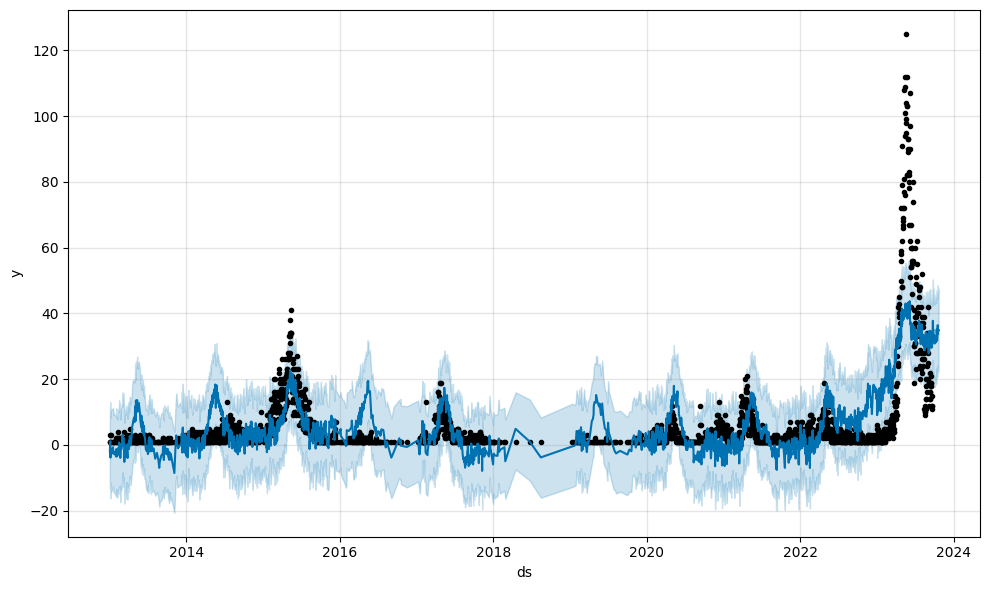

In [ ]:
# Make prediction
forecast_multivariate = model_multivariate.predict(future_multivariate)

# Visualize the forecast
model_multivariate.plot(forecast_multivariate);

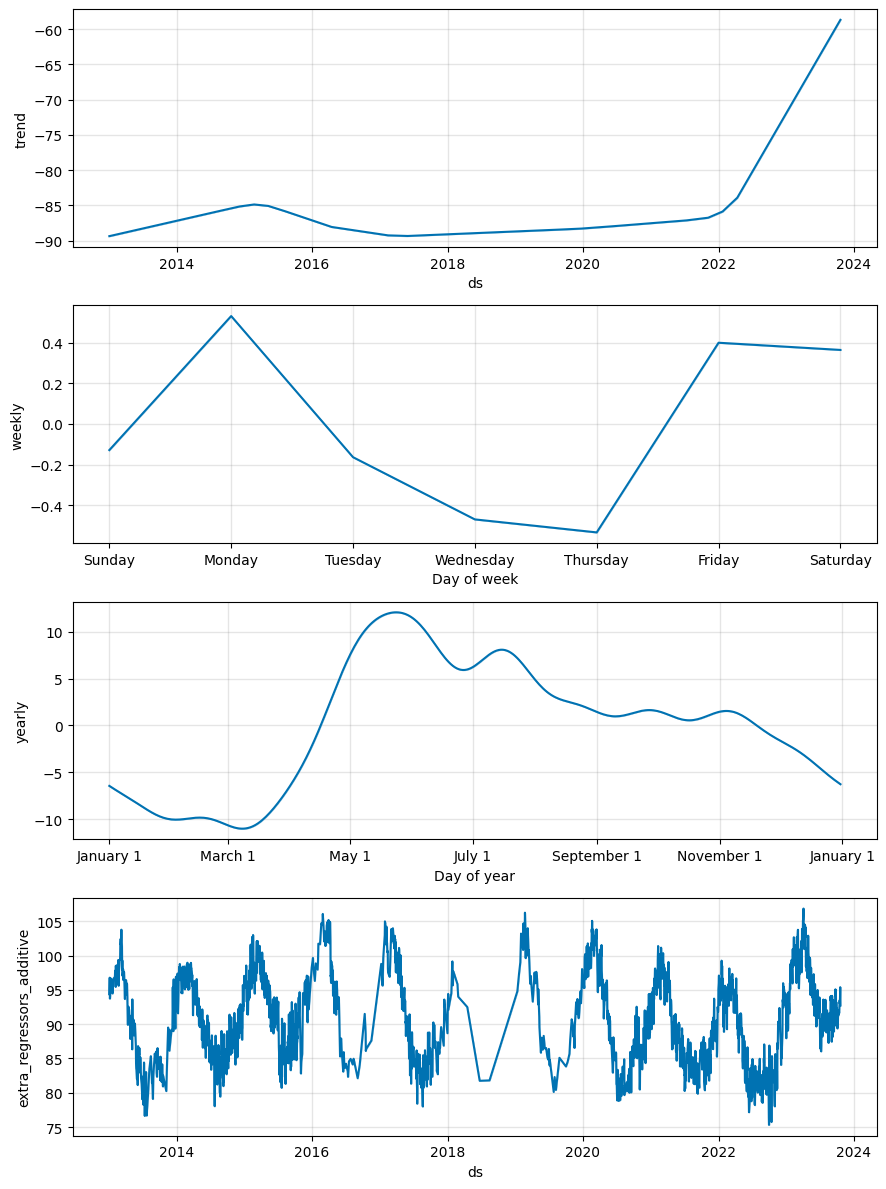

In [ ]:
# Visualize the forecast components
model_multivariate.plot_components(forecast_multivariate);

In [ ]:
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-30:], on='ds')

# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')

# Check MAPE value
performance_multivariate_MAPE = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAPE for the multivariate model is {performance_multivariate_MAPE}')

The MAE for the multivariate model is 27.56990391720814
The MAPE for the multivariate model is 8.040513170672945
